In [143]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
os.chdir("C:\\Users\\samuel.hill\\sporeforecaster")

In [144]:
with open('data\\interim\\imputed_historical.pkl', 'rb') as f:
    imported_data = pickle.load(f)
    full = imported_data['data']
    imputation_markers = imported_data['imputation_markers']
    date_start = imported_data['date_start']
    date_split = imported_data['date_split']
    taxa_list = imported_data['taxa_list']

In [145]:
train = full.query("date < @date_split")

In [146]:
imputation_guide = imputation_markers["train"]["Alternaria"]

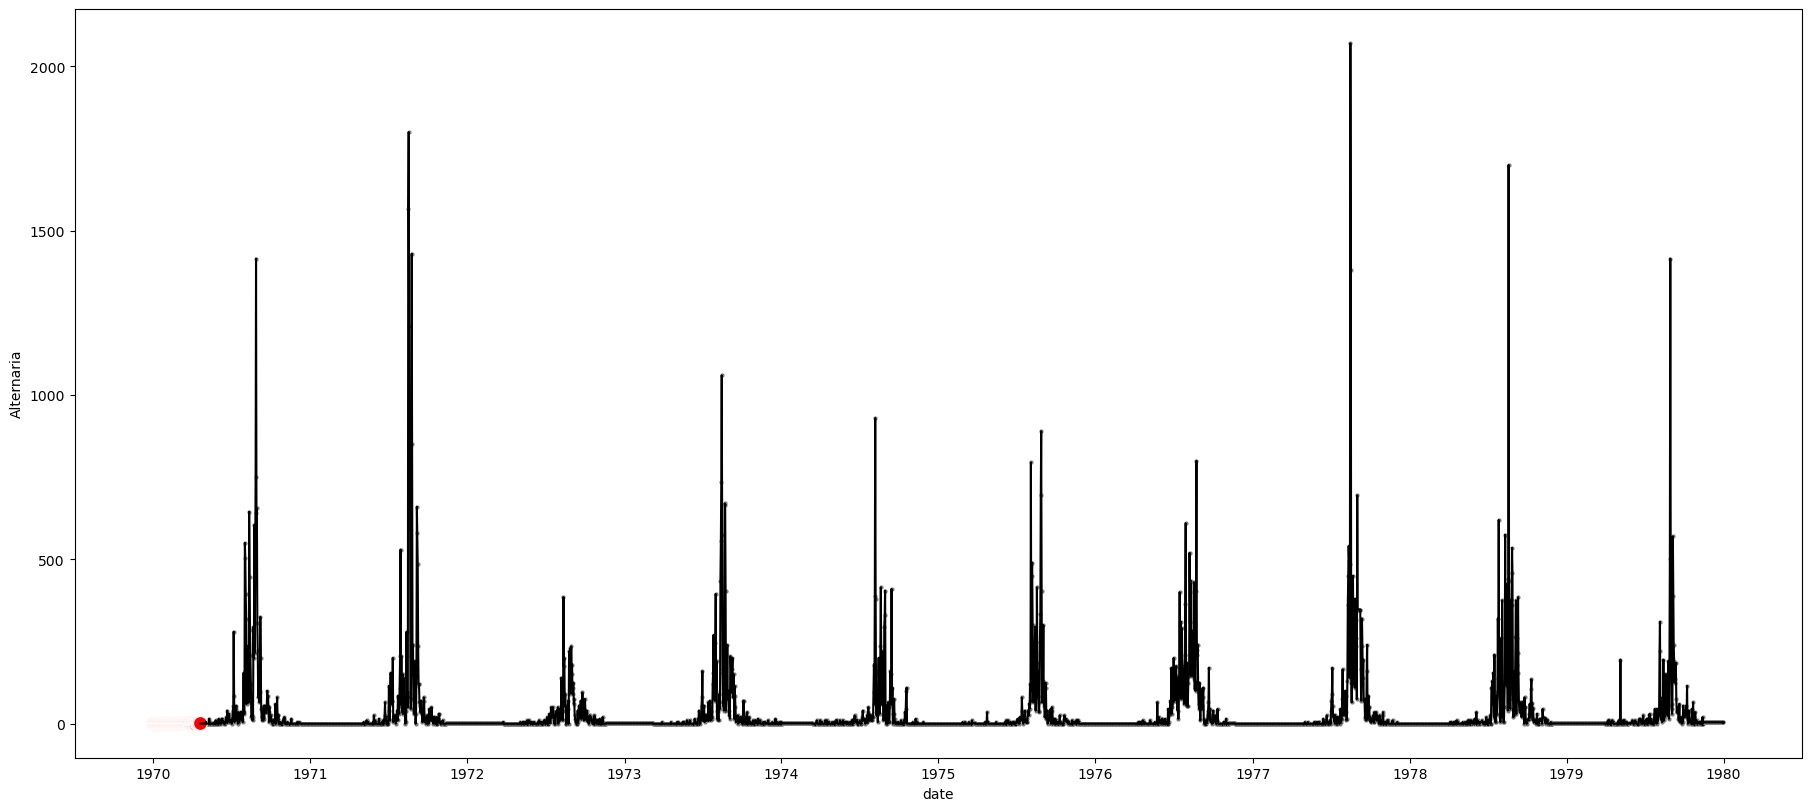

In [147]:
fig, ax = plt.subplots(figsize=[18, 8], constrained_layout=True)

year_start = 1970
year_end = 1980

full_with_guide = train.copy()

# Restrict period
full_with_guide = full_with_guide.query("year >= @year_start & year < @year_end")

# Create a new dataframe with the index and the guide included
full_with_guide['imputed'] = imputation_guide

# Separating observed and imputed values
observed = full_with_guide[full_with_guide['imputed'] == False]
imputed = full_with_guide[full_with_guide['imputed'] == True]

# Plotting observed and imputed values
sns.lineplot(x="date", y="Alternaria", data=observed, ax=ax, color='black')
sns.scatterplot(x="date", y="Alternaria", s=10, alpha=0.5, data=observed, ax=ax, color='black')
sns.scatterplot(x="date", y="Alternaria", s=100, data=imputed, ax=ax, color='red')
plt.show()
